# Actividad de visualización en Python 

- Datos de Salarios medios -> buscando desigualdades

## Datos de Salarios medios por ocupación

fuente: https://ine.es/jaxiT3/files/t/es/csv_bdsc/10916.csv?nocab=

Datos:

- Grupo de ocupación
- Sexo
- Año

Hay algunas filas con datos erróneos, os paso el código para corregirlo
Hay valores negativos en los salarios, hay que ponerlos en positivo

El grupo de ocupación tiene los nombres muy largos, están ordenados de más a menos cualificación

 - "A Directores y gerentes"                                                                                     
 - "B Técnicos y profesionales científicos e intelectuales de la salud y la enseñanza"                           
 - "C Otros técnicos y profesionales científicos e intelectuales"                                                
 - "D Técnicos, profesionales de apoyo"                                                                          
 - "E Empleados de oficina que no atienden al público"                                                           
 - "F Empleados de oficina que atienden al público"                                                              
 - "G Trabajadores de los servicios de restauración y comercio"                                                  
 - "H Trabajadores de los servicios de salud y el cuidado de personas"                                           
 - "I Trabajadores de los servicios de protección y seguridad"                                                   
-  "J Trabajadores cualificados en el sector agrícola, ganadero, forestal y pesquero"                            
-  "K Trabajadores cualificados de la construcción, excepto operadores de máquinas"                              
-  "L Trabajadores cualificados de las industrias manufactureras, excepto operadores de instalaciones y máquinas"
-  "M Operadores de instalaciones y maquinaria fijas, y montadores"                                              
-  "N Conductores y operadores de maquinaria móvil"                                                              
-  "O Trabajadores no cualificados en servicios (excepto transportes)"                                           
-  "P Peones de la agricultura, pesca, construcción, industrias manufactureras y transportes"                    
-  "Total" 

In [1]:
# Librerías que podéis necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib.request
import datetime as DT
import matplotlib.dates as mdates
import matplotlib.ticker as mtick #para formatar los ticks

### Corregir datos erróneos

- Leemos la tabla y sustituimos el ; que es incorrecto y la guaramos en local
- Leemos la tabla corregida


In [2]:
data = urllib.request.urlopen("https://ine.es/jaxiT3/files/t/es/csv_bdsc/10916.csv?nocab=")
f_out = open ("newtmp.csv","w")
for line in data:
  line = line.decode('utf-8')
  line = line.replace ("; profesionales de apoyo",", profesionales de apoyo")
  f_out.write (line)
f_out.close()


In [3]:

salarios_ocup_df = pd.read_csv ("newtmp.csv",
                    sep = ';',
                    thousands='.', 
                    decimal = ',',
                    na_values=[".."])
salarios_ocup_df['Periodo'] = pd.to_datetime(salarios_ocup_df['Periodo'], format="%Y")
salarios_ocup_df['year'] = pd.DatetimeIndex(salarios_ocup_df['Periodo']).year #le añado año para futuras visualizaciones
salarios_ocup_df.info()
print (salarios_ocup_df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Grupos de ocupación    561 non-null    object        
 1   Sexo/Brecha de género  561 non-null    object        
 2   Periodo                561 non-null    datetime64[ns]
 3   Total                  542 non-null    float64       
 4   year                   561 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 22.0+ KB
                                   Grupos de ocupación  \
0                                               Total    
1                                               Total    
2                                               Total    
3                                               Total    
4                                               Total    
..                                                 ..

In [4]:
salarios_ocup_df.columns
print (salarios_ocup_df['Grupos de ocupación'].unique())


['Total '
 'K Trabajadores cualificados de la construcción, excepto operadores de máquinas'
 'N Conductores y operadores de maquinaria móvil'
 'B Técnicos y profesionales científicos e intelectuales de la salud y la enseñanza'
 'I Trabajadores de los servicios de protección y seguridad'
 'A Directores y gerentes'
 'E Empleados de oficina que no atienden al público'
 'P Peones de la agricultura, pesca, construcción, industrias manufactureras y transportes'
 'D Técnicos, profesionales de apoyo'
 'C Otros técnicos y profesionales científicos e intelectuales'
 'G Trabajadores de los servicios de restauración y comercio'
 'F Empleados de oficina que atienden al público'
 'H Trabajadores de los servicios de salud y el cuidado de personas'
 'M Operadores de instalaciones y maquinaria fijas, y montadores'
 'L Trabajadores cualificados de las industrias manufactureras, excepto operadores de instalaciones y máquinas'
 'O Trabajadores no cualificados en servicios (excepto transportes)'
 'J Trabaj

### Preparar datos

- En algunas filas el valor de Total es negativo (debe ser un error) hacer que todos los valores de esa columna sean positivos usando la función abs()
- Se calculará la diferencia de salarios entre hombres y mujeres en unidades de 1000 euros 
- Se calculará la brecha de salarial 100 - columna `Cociente mujeres respecto a hombres` (porcentaje del salario de la mujer respecto del hombre. Está calculado como salario mujer * 100/ Salario del hombre) 
- Se simplificarán los nombres de los grupos de ocupación por ser muy largos
  - Separar el código, el texto
  - Se simplificará el nombre. 
- Eliminar el grupo de ocupación "J" que tiene valores incompletos

    

In [5]:
  salarios_ocup_df.Total = abs (salarios_ocup_df.Total) # Quitamos valores negtivos
  salarios_diff_df = salarios_ocup_df.pivot ( index =['Periodo','year','Grupos de ocupación'], columns = 'Sexo/Brecha de género', values ='Total' ) # ensanchamos Sexo/Brecha de género
  salarios_diff_df.reset_index( inplace=True) #quitamos los índices
  salarios_diff_df['diff_salario'] = (salarios_diff_df.Hombres-salarios_diff_df.Mujeres)/1000  #calculamos diferencia entre hombres y mujeres
  salarios_diff_df['brecha'] = (100 - salarios_diff_df['Cociente mujeres respecto a hombres'])  #calculamos brecha
  salarios_diff_df['code'], salarios_diff_df['Grupos de ocupación'] = salarios_diff_df['Grupos de ocupación'].str.split(" ", 1).str  #separamos código de
                                                                                          #ocupación
  salarios_diff_df = salarios_diff_df[salarios_diff_df['code'] != "J"] #filtramos grupo J


# simplificamos nombres 

code = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Total"]
ocup_simple =  [ "Directores y gerentes",
                  "Científicos, salud y la enseñanza",
                  "Otros profesionales científicos",
                  "Profesionales de apoyo",
                  "Administrativos",
                  "Atención al público",
                  "Servicios de restauración y comercio",
                  "Servicios de salud y cuidados",
                  "Servicios de seguridad",
                  "Cualificados sector agrario",
                  "Cualificados sector construcción",
                  "Cualificados sector industrial",
                  "Operadores de instaladores",
                  "Conductores y maquinistas",
                  "No cualificados sector servicios",
                  "Peones",
                  "Total"]

ocup_nombre_df = pd.DataFrame(list(zip(code,ocup_simple)), columns = ['code','ocup_simple'])
#añadimos la ocupación simplificada

salarios_diff_df.set_index('code',inplace = True) # establecemos el index para el join
ocup_nombre_df.set_index ('code',inplace = True) # establecemos el index para el join
salarios_diff_df =  salarios_diff_df.join (ocup_nombre_df ) #hacemos el join
salarios_diff_df.reset_index( inplace=True) #quitamos los índices 

salarios_diff_df.info()
print (salarios_diff_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   code                                 176 non-null    object        
 1   Periodo                              176 non-null    datetime64[ns]
 2   year                                 176 non-null    int64         
 3   Grupos de ocupación                  176 non-null    object        
 4   Cociente mujeres respecto a hombres  176 non-null    float64       
 5   Hombres                              176 non-null    float64       
 6   Mujeres                              176 non-null    float64       
 7   diff_salario                         176 non-null    float64       
 8   brecha                               176 non-null    float64       
 9   ocup_simple                          176 non-null    object        
dtypes: datetime64[

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


### Evolución de la brecha Salarial de la mujer respecto del hombre por grupo de ocupación




####  Line chart con facetas por actividad con seaborn

- Utilizaremos el dataframe salarios_diff_df
 - La brecha está calculada en la columna 'brecha'
 - Usaremos el grupo de ocupación simplificado, columna 'ocup_simple' para dividir en facetas



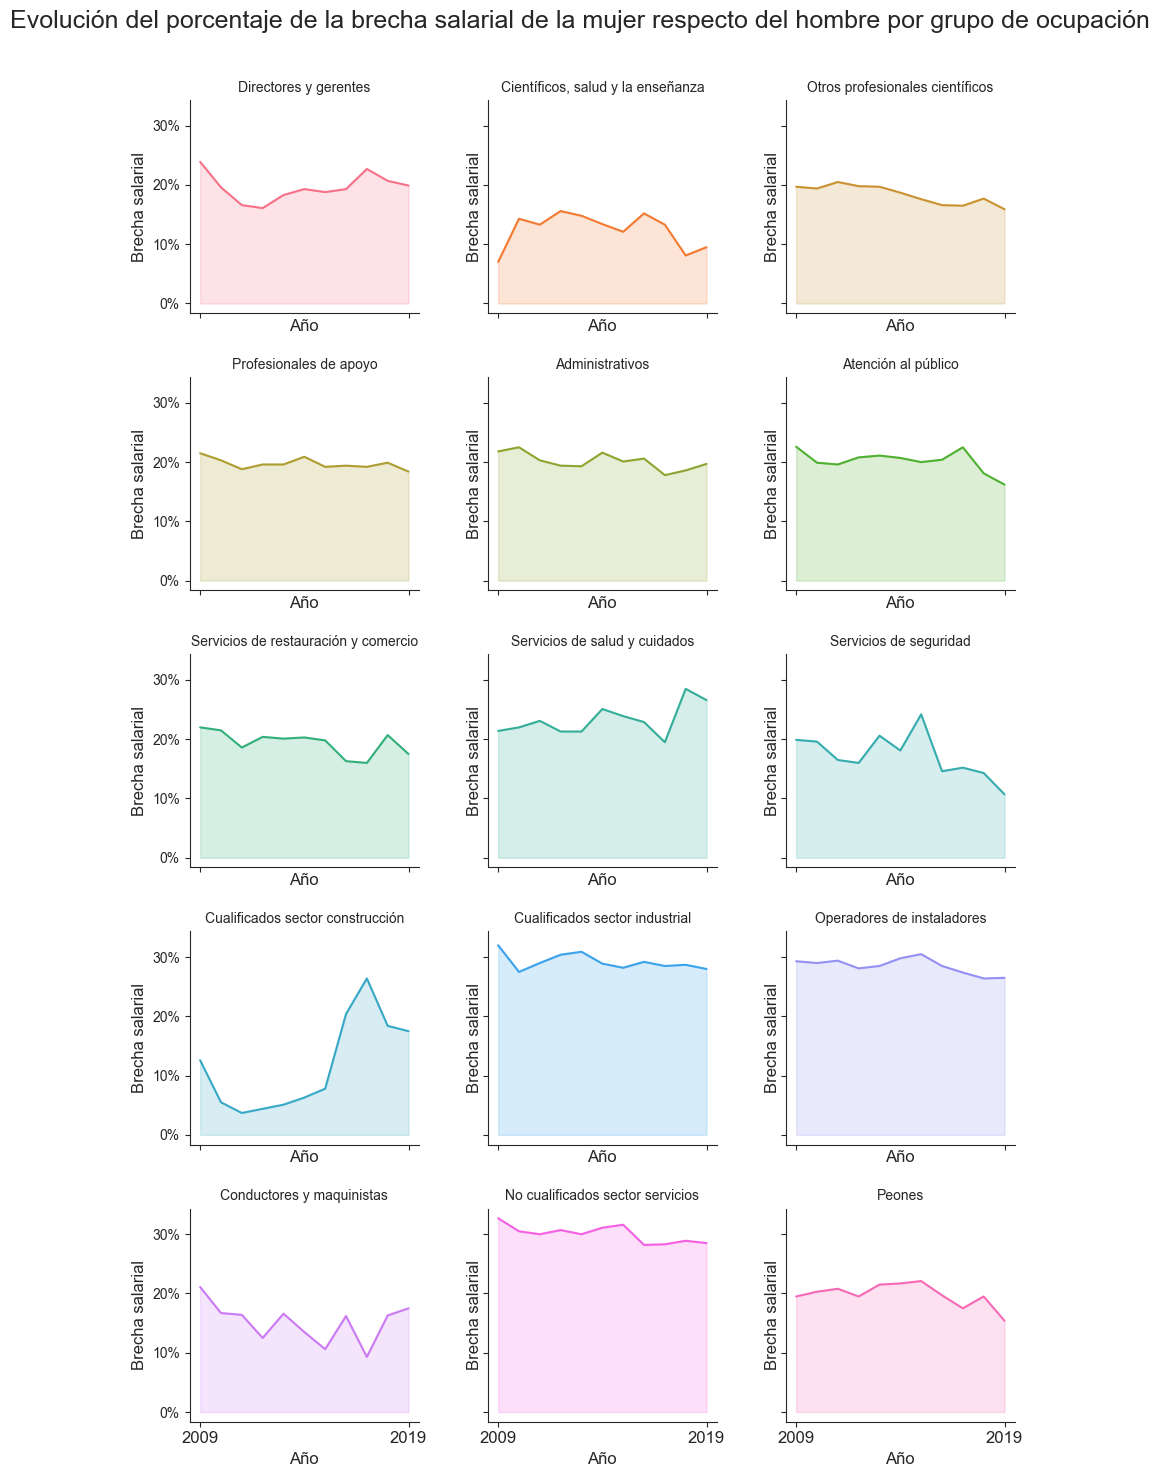

In [6]:
# Eliminar "Total" de ocup_simple. Sólo nos interesa las profesiones por separado.
salarios_diff_df = salarios_diff_df[salarios_diff_df['ocup_simple'] != 'Total']

import matplotlib.dates as mdates
mis_tricks = [min(salarios_diff_df.year),max(salarios_diff_df.year)]
fmt = '%.0f%%' # Formato de los ticks'
yticks = mtick.FormatStrFormatter(fmt)

sns.set_style("ticks")
g = sns.FacetGrid(salarios_diff_df, col="ocup_simple", hue="ocup_simple", col_wrap = 3)
g = g.map(plt.plot, "year", "brecha")
g = g.map(plt.fill_between, "year", "brecha", alpha = 0.2)

for ocup_simple, ax in g.axes_dict.items():
    ax.set_title(ocup_simple,fontsize= 10) # title of plot
    ax.set_xlabel('Año',fontsize = 12)  #xlabel
    ax.set_ylabel('Brecha salarial', fontsize = 12) #ylabel
    ax.set_xticks(mis_tricks)
    ax.set_xticklabels(mis_tricks, fontsize = 12)
    ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
# Añadimos título 
g = g.fig.suptitle('Evolución del porcentaje de la brecha salarial de la mujer respecto del hombre por grupo de ocupación', fontsize = 18)
# Ajustamos separación de facetas
plt.subplots_adjust(top=0.92, wspace =0.3, hspace =0.3)
plt.show()

#### Heatmap con seaborn

- Necesitamos ensanchar los datos por años
- Usaremos 'year' en vez de 'Periodo' porque da problemas de formateo de ejes
- Poner en qué unidades están los datos
- Ordenados de valor más alto a más bajo respecto al valor más reciente de la brecha salarial
- Color más oscuro con valores más altos (paleta con xxx_r)



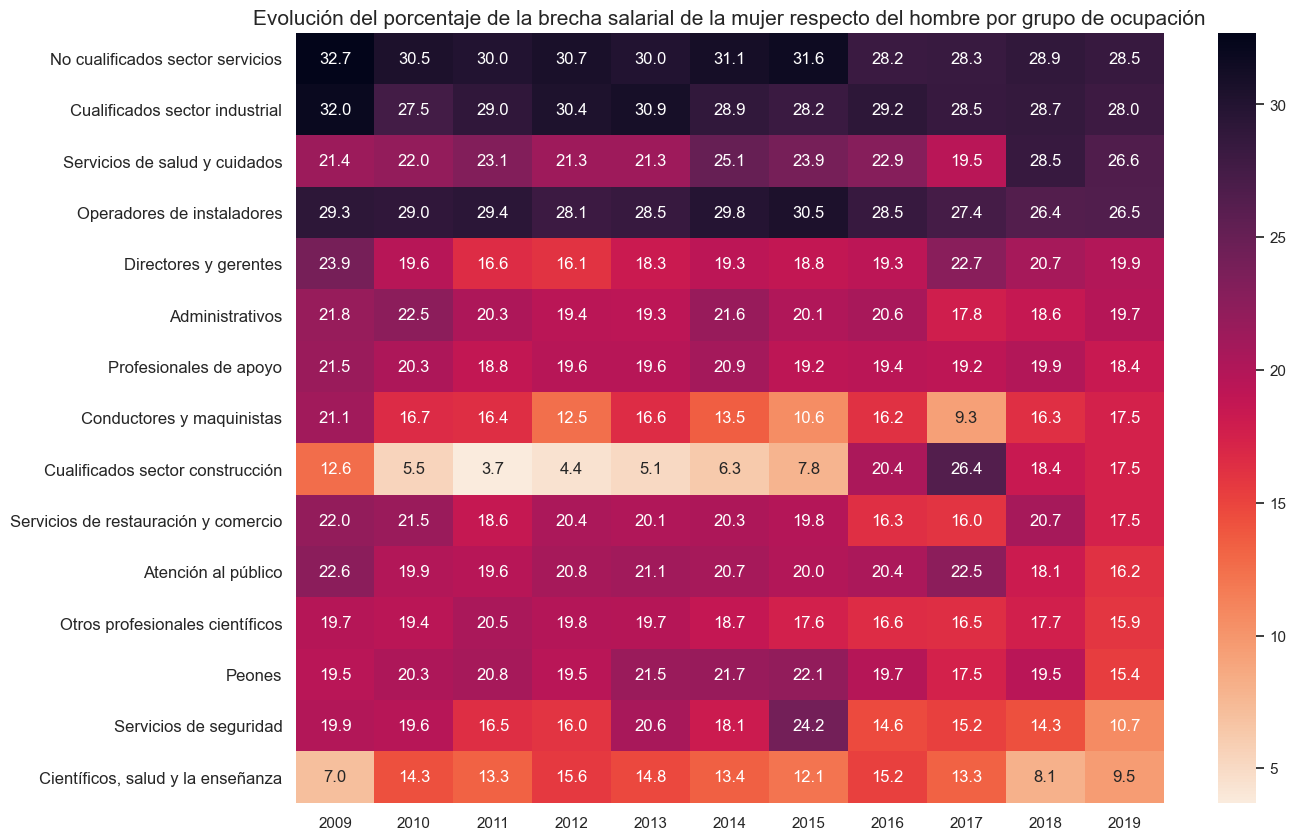

In [7]:
salarios_diff_ocup_year_df = salarios_diff_df.pivot("ocup_simple","year","brecha")
salarios_diff_ocup_year_df = salarios_diff_ocup_year_df.sort_values(max(salarios_diff_df.year), ascending = False)

sns.set_theme()

plt.rcParams["figure.figsize"]=[14,10]
ax = sns.heatmap(salarios_diff_ocup_year_df, annot = True, fmt='.1f', cmap='rocket_r') 
ax.set_title("Evolución del porcentaje de la brecha salarial de la mujer respecto del hombre por grupo de ocupación",size =15)
ax.set_xlabel('')  #xlabel
ax.set_ylabel('') #ylabel
ax.yaxis.set_tick_params(labelsize=12)
plt.show()


### Relación entre brecha salarial vs. diferencia salarial entre hombres y mujeres para el grupo de 'Directores y gerentes'



#### Gráfica de doble eje con matplotlib

- Hay que filtrar por 'Directores y gerentes'
-- Del dataframe filtrado usaremos
 - columna 'brecha'
 - columna 'diff_salario'
- Hacer que los ejes y empiecen en 0 usando ax1.set_ylim(ymin=0) y ax2.set_ylim(ymin=0)


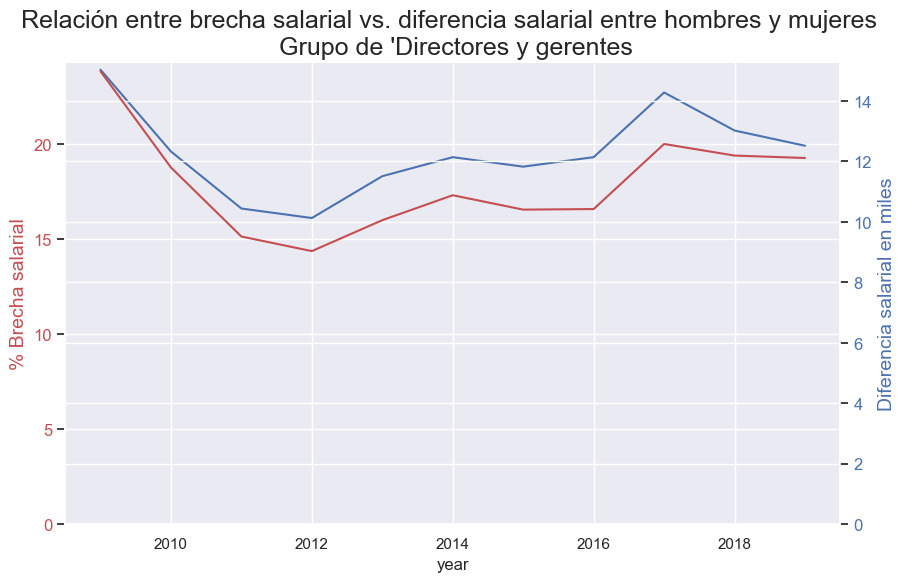

In [14]:
salarios_diff_dir_df = salarios_diff_df[salarios_diff_df['ocup_simple'] == "Directores y gerentes"]
salarios_diff_dir_df = salarios_diff_dir_df[['brecha','diff_salario','year']]

brecha_dir_df = salarios_diff_dir_df.set_index('year')
diffsal_dir_df = salarios_diff_dir_df.set_index('year')

plt.figure(figsize= (10,6))

ax1 = brecha_dir_df.brecha.plot()
ax2 = diffsal_dir_df.diff_salario.plot(secondary_y = True, style = "r")

# Completamos detalles con matplotlib
ax1.set_ylabel ('% Brecha salarial', fontsize=14, color='r')
ax1.yaxis.set_tick_params(labelsize=12,labelcolor='r')
ax1.grid (True) # Añado grid

ax2.set_ylabel ('Diferencia salarial en miles' , fontsize=14, color='b')
ax2.yaxis.set_tick_params(labelsize=12,labelcolor='b')

ax1.set_ylim(ymin=0)
ax2.set_ylim(ymin=0)
# Global figure properties
plt.title("Relación entre brecha salarial vs. diferencia salarial entre hombres y mujeres \n Grupo de 'Directores y gerentes", fontsize=18)
plt.show()
